# OPTIONAL Workbook for Homework #8

You are welcome to work on a local version of a notebook and upload it for this assignment.

This workspace is here if you'd rather not have to install all necessary packages locally.

You can download any json files to your local computer to add them to your jekyll page.

To download, you can right-click on the file and hit download.  For example, with the following code:

```python
from vega_datasets import data
import altair as alt

source = data.cars()
source.rename(columns={"Miles_per_Gallon":"Miles per Gallon"}, 
              inplace=True)


chart = alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles per Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles per Gallon']
).interactive()

chart.properties(width='container').save("cars.json")
```

You can download from the side bar like this:

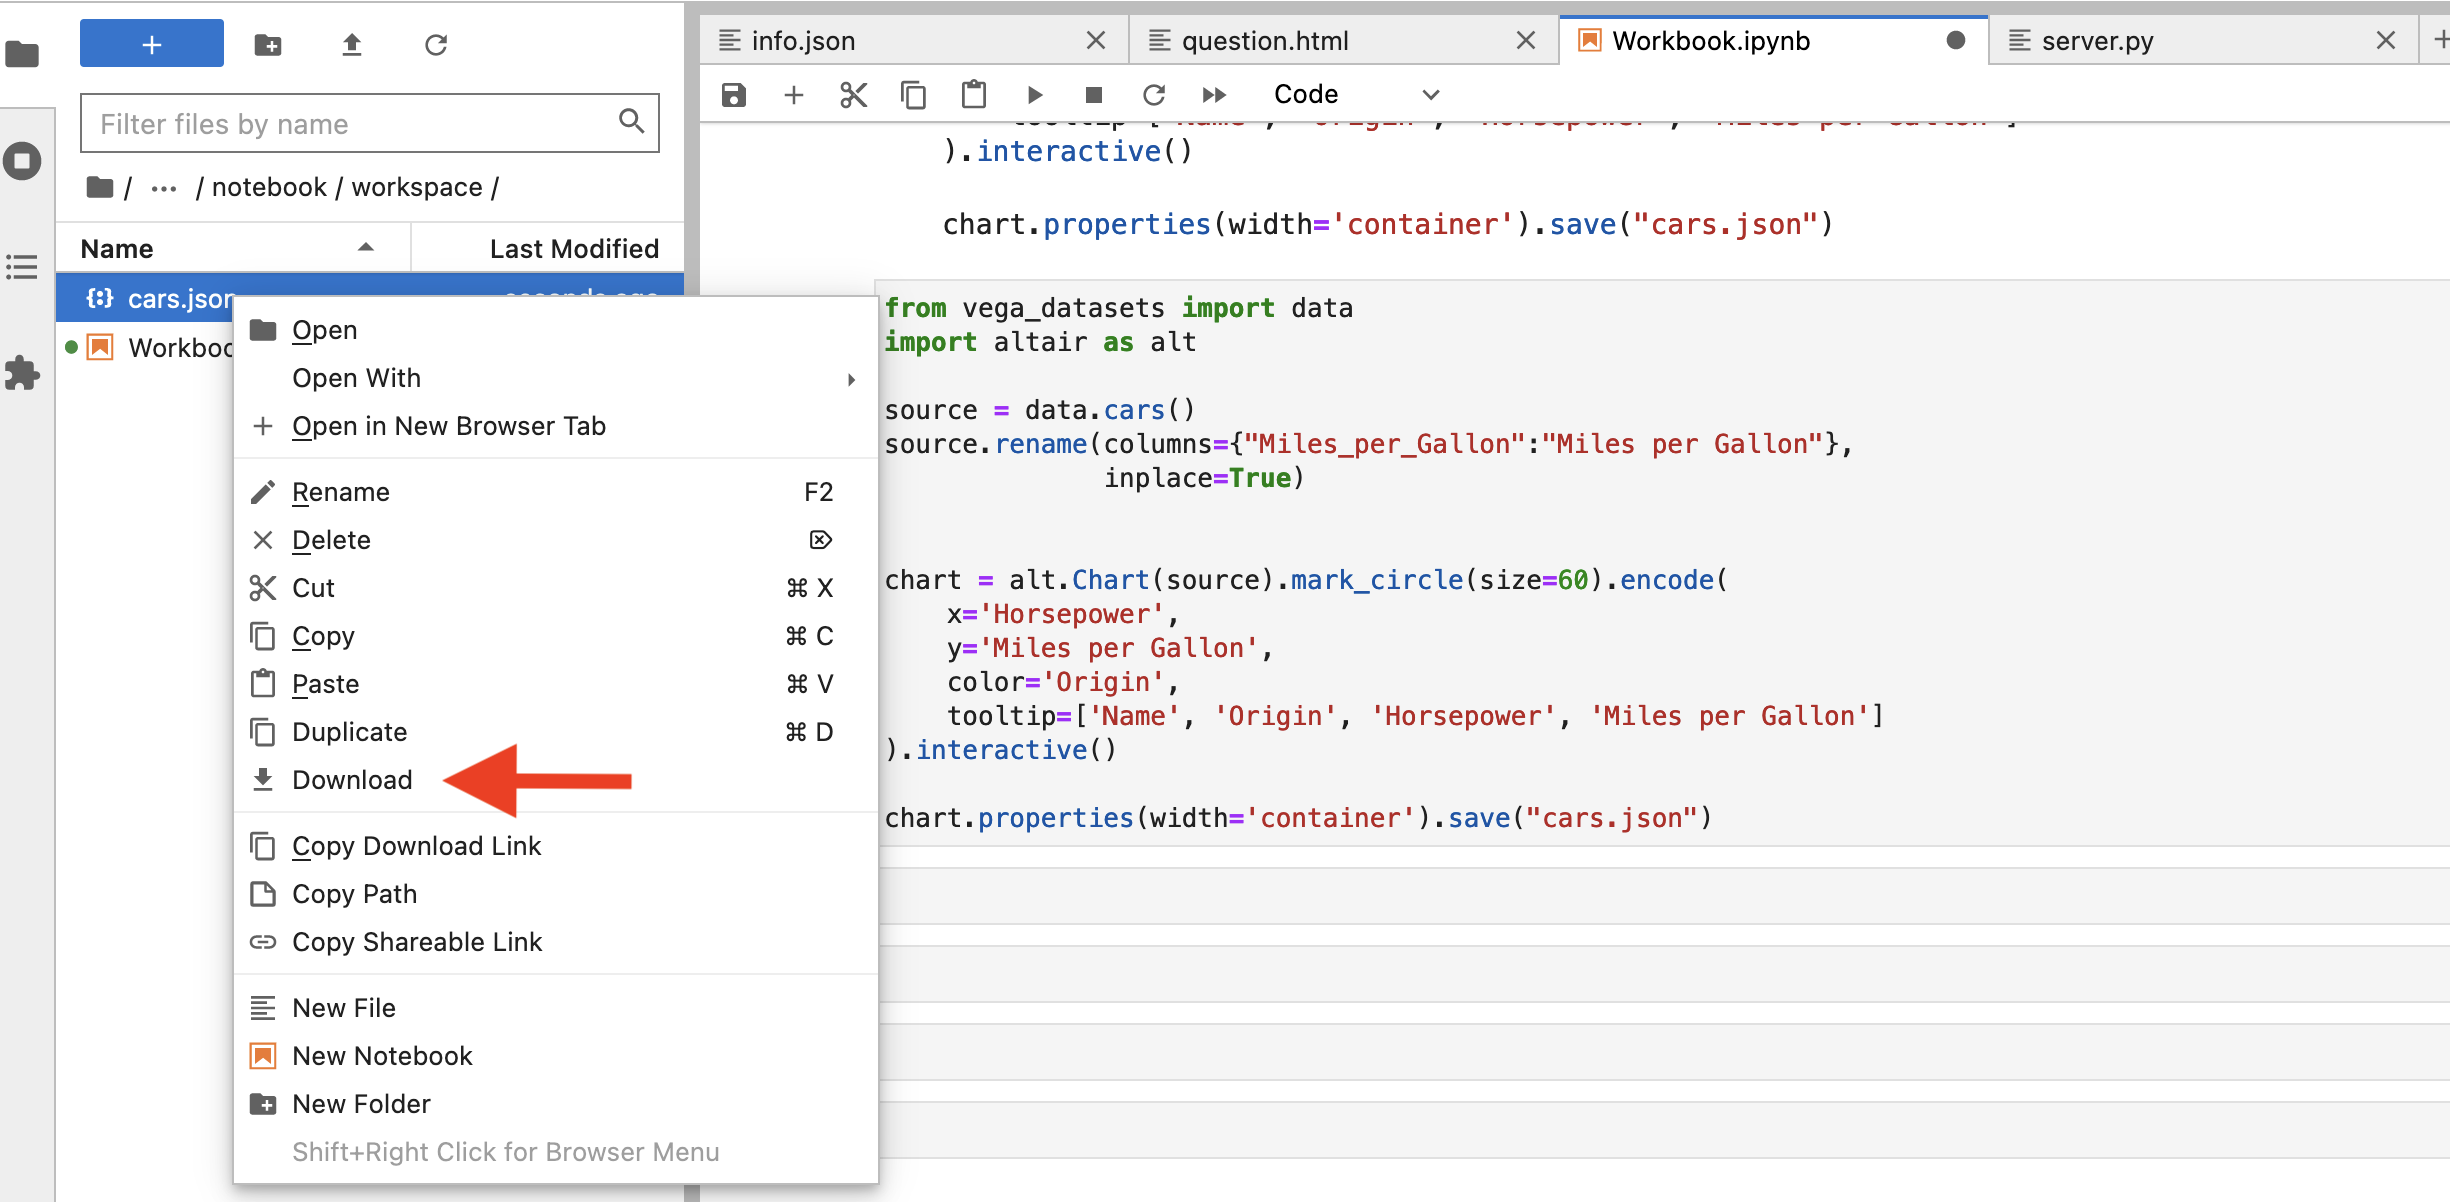

In [9]:
import pandas as pd
import numpy as np

ufos = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/ufo-scrubbed-geocoded-time-standardized-cnames.csv",
                  parse_dates = ["date", "report_date"])
ufos.head()

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [11]:
nsamples = 5000
#nsamples = 5000 # if you want a larger sample
downSampleMask = np.random.choice(range(len(ufos)-1), 
                                  nsamples, replace=False)
ufosDS = ufos.loc[downSampleMask]

In [36]:
import altair as alt

ufosDS['year'] = pd.to_datetime(ufosDS['date']).dt.year
df_us = ufosDS[ufosDS['country'] == 'us'].copy()

year_counts = (
    df_us.groupby('year')
         .size()
         .reset_index(name='count')
)

ufolinechart = (
    alt.Chart(year_counts)
    .mark_line(point=True)
    .encode(
        x='year:O',
        y='count:Q',
        tooltip=['year:O','count:Q']
    ))

ufolinechart

alt.Chart(...)

For my first visualization, I generated a line chart that displays the total number of UFO sightings per year across the United States. This graph provides a high-level view of how UFO reporting frequency has changed over time. A line mark was selected because line charts naturally reveal trends, increases, and decreases in temporal data.

To build the plot, I extracted the year from the ufosDS date column and filtered the dataset so only the rows with sightings in the US were included (df_us). I then computed an aggregation to obtain the total number of sightings for each year. The year is encoded on the x-axis and treated as an ordered field, while the total count is encoded on the y-axis. I avoided adding a color encoding because there is no additional variable needing differentiation. 

Even without interactivity, this line chart is a useful, clear summary of long-term UFO reporting trends.


In [37]:
year_slider = alt.param(
    name="Year",
    bind=alt.binding_range(
        min=df_us['year'].min(),
        max=df_us['year'].max(),
        step=1
    ),
    value=int(df_us['year'].min())
)

ufobarchart = (
    alt.Chart(df_us)
    .mark_bar()
    .encode(
        x=alt.X('state:N', sort='-y', title='US State'),
        y=alt.Y('count():Q', title='Count of UFO Sighting Reports'),
        tooltip=['state:N', 'count():Q']
    )
    .add_params(year_slider)
    .transform_filter("datum.year == Year")
)

ufobarchart

alt.Chart(...)

This plot displays the number of UFO sightings in each US state for a single selected year. The purpose is to see how the geographic distribution of sightings has changed over time. I chose to configure a bar chart as the visualization showcases counts across discrete categories (states). 

For data preprocessing, I used the same df_us dataset as the line chart, which contains only reports from the United States. The state variable is encoded on the x-axis as a nominal field, and Altair’s count() aggregate is used on the y-axis to compute the number of sightings per state.

The interactivity in the bar chart comes from a year slider. This slider updates the visualization by filtering each data entry's year to the current slider value. This interactive filtering makes the visualization more engaging and more effective for identifying temporal patterns.

In [38]:
ufolinechart.properties(width='container').save("line.json")
ufobarchart.properties(width='container').save("bar.json")